**author**: sgibbons@mit.edu<br>
**date**: 22 Dec 2016<br>
**language**: Python 3.5<br>
**license**: BSD3<br>

## rrna_copy_number_analysis.ipynb

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import h5py as h5
#import empcolors
%run ../../code/colors-and-styles/empcolors.py
%matplotlib inline

/Users/jonsanders/Development/anaconda/envs/py3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
#filter tables by metadata presence/absence filter_samples_from_otu_table.py -i emp_cr_gg_13_8.biom -m emp_qiime_mapping_all_emp.tsv -s 'Description:*' -o emp_cr_gg_13_8_filt.biom --output_mapping_fp emp_qiime_mapping_all_emp_filt.tsv

emp_gg_otus_sampsum = pd.read_csv('../../data/predicted-rrna-copy-number/emp_cr_gg_13_8.qc_filtered_filt_summary_samplesum.txt',sep='\t',index_col=0,header=None).sort_index()
emp_gg_otus_norm_sampsum = pd.read_csv('../../data/predicted-rrna-copy-number/emp_cr_gg_13_8.normalized_qcfilt_summary_samplesum.txt',sep='\t',index_col=0,header=None).sort_index()

emp_gg_otus_meta = pd.read_csv('../../data/mapping-files/emp_qiime_mapping_qc_filtered.tsv',sep='\t',index_col=0,header=0).sort_index()

In [4]:
emp_gg_otus_meta['sampsum'] = emp_gg_otus_sampsum[1]
emp_gg_otus_meta['normsampsum'] = emp_gg_otus_norm_sampsum[1]
emp_gg_otus_meta['copynumberdepletion'] = np.divide(emp_gg_otus_norm_sampsum[1],emp_gg_otus_sampsum[1])
emp_gg_otus_meta['averagecopy'] = np.divide(1,np.divide(emp_gg_otus_norm_sampsum[1],emp_gg_otus_sampsum[1]))

In [5]:
emp_gg_otus_meta.head()

,BarcodeSequence,LinkerPrimerSequence,Description,host_subject_id,study_id,title,principal_investigator,doi,ebi_accession,target_gene,...,salinity_psu,oxygen_mg_per_l,phosphate_umol_per_l,ammonium_umol_per_l,nitrate_umol_per_l,sulfate_umol_per_l,sampsum,normsampsum,copynumberdepletion,averagecopy
#SampleID,,,,,,,,,,,,,,,,,,,,,
1001.SKB1,GTCCGCAAGTTA,GTGCCAGCMGCCGCGGTAA,Burmese bulk,SKB1,1001,Understanding cultivar-specificity and soil de...,Suzanne Kennedy,10.1371/journal.pone.0099641,ERP016540,16S rRNA,...,7.15,NaN,NaN,NaN,NaN,NaN,11875.0,4417.225397,0.371977,2.688339
1001.SKB2,CGTAGAGCTCTC,GTGCCAGCMGCCGCGGTAA,Burmese bulk,SKB2,1001,Understanding cultivar-specificity and soil de...,Suzanne Kennedy,10.1371/journal.pone.0099641,ERP016540,16S rRNA,...,7.15,NaN,NaN,NaN,NaN,NaN,12706.0,4667.695238,0.367362,2.722114
1001.SKB3,CCTCTGAGAGCT,GTGCCAGCMGCCGCGGTAA,Burmese bulk,SKB3,1001,Understanding cultivar-specificity and soil de...,Suzanne Kennedy,10.1371/journal.pone.0099641,ERP016540,16S rRNA,...,7.15,NaN,NaN,NaN,NaN,NaN,15287.0,5505.959127,0.360173,2.776446
1001.SKB4,CCTCGATGCAGT,GTGCCAGCMGCCGCGGTAA,Burmese Rhizo,SKB4,1001,Understanding cultivar-specificity and soil de...,Suzanne Kennedy,10.1371/journal.pone.0099641,ERP016540,16S rRNA,...,7.15,NaN,NaN,NaN,NaN,NaN,13091.0,4398.515079,0.335995,2.976232
1001.SKB5,GCGGACTATTCA,GTGCCAGCMGCCGCGGTAA,Burmese Rhizo,SKB5,1001,Understanding cultivar-specificity and soil de...,Suzanne Kennedy,10.1371/journal.pone.0099641,ERP016540,16S rRNA,...,7.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# save data file
emp_gg_otus_meta.loc[:,['#SampleID','empo_0','empo_1','empo_2','empo_3','averagecopy']].to_csv('../../data/predicted-rrna-copy-number/emp_rrna_averagecopy_empo.csv')

In [7]:
def format_figure():
    plt.xlabel('Average community 16S copy number', fontsize=14)
    plt.ylabel('Number of samples', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlim([0,8])
    plt.tight_layout()

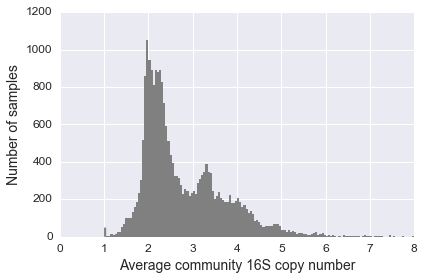

In [9]:
#emp_gg_otus_meta['averagecopy'].plot(kind='hist',legend=False,bins=200,linewidth=0)

plt.hist(emp_gg_otus_meta['averagecopy'].dropna(), bins=200, linewidth=0, color=get_empo_cat_color('EMP sample'))
format_figure()
plt.savefig('copy_number_16s_emp_empo0.pdf')

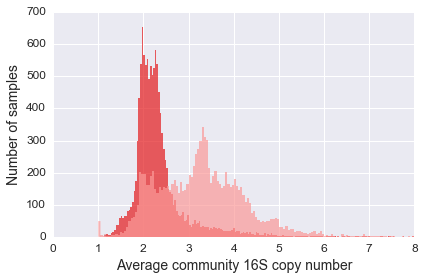

In [10]:
#biom_grouped = emp_gg_otus_meta.groupby('empo_1')
#biom_grouped['averagecopy'].plot(kind='hist',alpha=0.3,legend=True,bins=200,linewidth=0)

for i in emp_gg_otus_meta.empo_1.unique():
    plt.hist(emp_gg_otus_meta[emp_gg_otus_meta.empo_1 == i]['averagecopy'].dropna(), label=i,
             bins=200, linewidth=0, color=get_empo_cat_color(i), alpha=0.7)

#plt.legend(loc=1,prop={'size':8})
format_figure()
plt.savefig('copy_number_16s_emp_empo1.pdf')

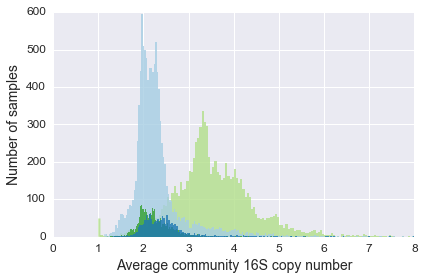

In [11]:
# biom_grouped = emp_gg_otus_meta.groupby('empo_2')
# biom_grouped['averagecopy'].plot(kind='hist',alpha=0.5,legend=True,bins=200,linewidth=0)

for i in ['Animal', 'Non-saline', 'Plant', 'Saline']:
    plt.hist(emp_gg_otus_meta[emp_gg_otus_meta.empo_2 == i]['averagecopy'].dropna(), label=i,
             bins=200, linewidth=0, color=get_empo_cat_color(i), alpha=0.8)

#plt.legend(loc=1,prop={'size':8})
format_figure()
plt.savefig('copy_number_16s_emp_empo2.pdf')

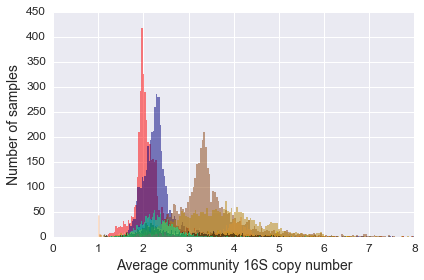

In [12]:
# biom_grouped = emp_gg_otus_meta.groupby('empo_3')
# biom_grouped['averagecopy'].plot(kind='hist',alpha=0.5,legend=True,bins=200,linewidth=0)

for i in emp_gg_otus_meta.empo_3.unique():
    plt.hist(emp_gg_otus_meta[emp_gg_otus_meta.empo_3 == i]['averagecopy'].dropna(), label=i,
             bins=200, linewidth=0, color=get_empo_cat_color(i), alpha=0.5)

#plt.legend(loc=1,prop={'size':8})
format_figure()
plt.savefig('copy_number_16s_emp_empo3.pdf')

(0, 8)

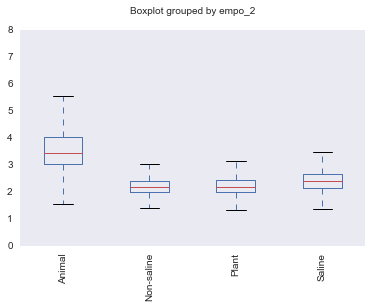

In [13]:
bp = emp_gg_otus_meta.boxplot('averagecopy',by='empo_2',grid=False,rot=90)
plt.xlabel('')
plt.title('')
plt.ylim([0,8])

(0, 8)

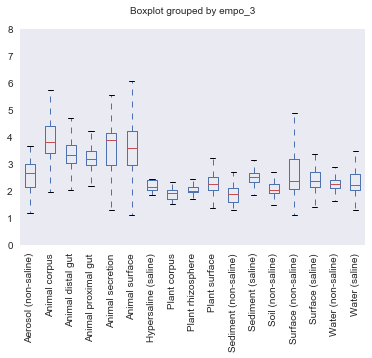

In [14]:
bp = emp_gg_otus_meta.boxplot('averagecopy',by='empo_3',grid=False,rot=90)
plt.xlabel('')
plt.title('')
plt.ylim([0,8])

(0, 8)

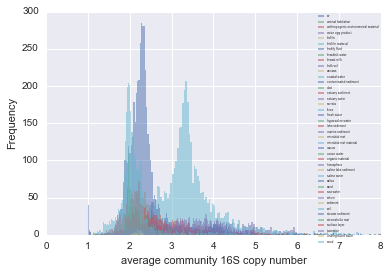

In [15]:
biom_grouped = emp_gg_otus_meta.groupby('env_material')

biom_grouped['averagecopy'].plot(kind='hist',alpha=0.5,legend=True,bins=200,linewidth=0)
plt.legend(loc=1,prop={'size':3})
plt.xlabel('average community 16S copy number')
plt.xlim([0,8])
#plt.savefig('copy_number_16s_emp_env_material.pdf', dpi=300, format='pdf')